Full article on https://carminemnc.github.io/notebooks/clustering/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import *  # for clustering diagnostics
from sklearn.metrics import silhouette_score

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# reading data
df = pd.read_csv('customer_segmentation.csv')
df = df.dropna()

# Automatically select categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(sparse_output=False, 
                              handle_unknown='ignore', 
                              drop=None,
                              dtype=float), categorical_cols)
    ])

# Fit and transform the data
data_processed = preprocessor.fit_transform(df)

In [ ]:
clusters_range = range(2,10)
bg = "#EAEAEA"

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(6, 10))
fig.tight_layout(pad=3)
fig.set_facecolor(bg)

km = KMeans(init='k-means++', n_init=12, max_iter=100)

# Distortion: mean sum of squared distances to centers
elb = KElbowVisualizer(km, k=clusters_range, ax=ax[0], locate_elbow=True,n_jobs=1)
elb.fit(data_processed)
# ax[0].legend(loc='upper left')
ax[0].set_title('Distortion score Elbow for KMeans Clustering')

# Silhouette: mean ratio of intra-cluster and nearest-cluster distance
sil = KElbowVisualizer(km, k=clusters_range, metric='silhouette', locate_elbow=True, ax=ax[1],n_jobs=1)
sil.fit(data_processed)
# ax[1].legend(loc='upper left')
ax[1].set_title('Silhouette score Elbow for KMeans Clustering')

# Calinski Harabasz: ratio of within to between cluster dispersion
cal = KElbowVisualizer(km, k=clusters_range, metric='calinski_harabasz', locate_elbow=True, ax=ax[2],n_jobs=1)
cal.fit(data_processed)
# ax[2].legend(loc='upper left')
ax[2].set_title('Calinski Harabasz score Elbow for KMeans Clustering')

plt.show()

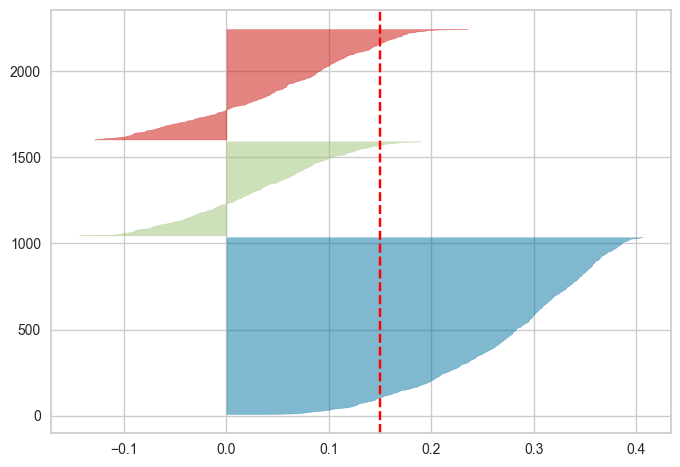

In [3]:
# fitting kmeans
km = KMeans(n_clusters=3, init='k-means++', n_init=12, max_iter=2000,algorithm="elkan")

# Calculate silhouette score
silhouette_avg = round(silhouette_score(data_processed, km.fit_predict(data_processed)), 4)

# silhouette coefficient plot
silhouette = SilhouetteVisualizer(km, colors='yellowbrick')
silhouette.fit(data_processed)

plt.show()

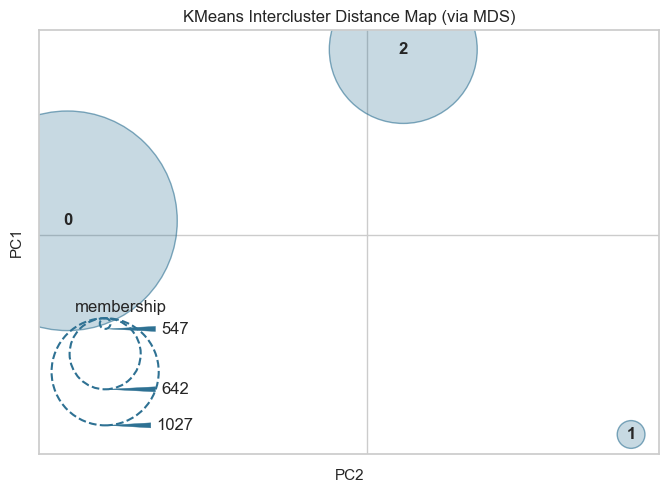

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [4]:
# intercluster distance plot
icd = InterclusterDistance(km, legend_loc='lower left')
icd.fit(data_processed)
icd.show()